___
# Atividade: Teoria da Probabilidade
___

## Aula 08

**Referência de Leitura:**
1. Magalhães e Lima (7ª. Edição): pág. 49 a 68 - Probabilidades

**Hoje:**
1. Conceito de Probabilidade
4. Probabilidade Condicional
3. Independência de eventos
5. Teorema de Bayes. Simulação do problema de Monty Hall

**Próxima aula:**
1. Magalhães e Lima (7ª. Edição): pág. 69 a 104 - Variáveis aleatórias discretas
___

In [7]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

#Bibliotecas necessárias
from numpy.random import shuffle, randint, choice
import random
import numpy as np

## <font color='blue'>Exercício 1</font>

Monte a simulação de 1000 jogadas de um dado idôneo de 6 faces. Faça o histograma (normalizado) da frequência.

    a) Olhando o histograma, o que pode se dizer sobre as probabilidade de cada face?
    
    b) Discorra sobre o porque da probabilidade não ser exatamente igual à teórica.

(array([ 126.,  167.,  146.,  126.,  155.,  146.,  134.]),
 array([0, 1, 2, 3, 4, 5, 6, 7]),
 <a list of 7 Patch objects>)

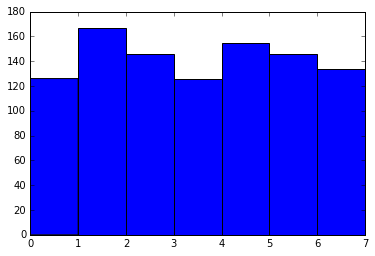

In [42]:
t= 0
listad = []

while t < 1000:
    d = random.randint (0,6)
    listad.append (d)
    t += 1

#plt.hist(listad, bins=np.linspace(np.min(1), np.max(7)))
plt.hist(listad, bins=range(min(listad), max(listad) + 2))


#http://stackoverflow.com/questions/31596443/plotting-histrogram-from-numpy-array

A probabilidade não é igual à teorica pois a probabilidade é aleatória,
nesste caso principalmente por causa do número de rodadas testadas,
se fossem feitas mais rodadas, com certeza o número se aproximaria
do teórico

___
## <font color='blue'>Exercício 2</font>

Ampliando o espaço amostral para as possíveis jogadas de 2 dados, analise as seguintes situações:
    
    a) Jogando os dois dados ao mesmo tempo. Qual é a probabilidade de obter soma 7?
    
    b) Jogando um dado e depois o segundo dado. Qual é a probabilidade de obter soma 7 já sabendo o resultado do primeiro? Compare o resultado com item anterior! Por que é igual ou diferente?

In [127]:
t= 0
somas = 0

while t < 100000:
    d1 = random.randint (0,6)
    d2 = random.randint (0,6)
    soma = d1 + d2
    if soma == 7:
        somas += 1
    t += 1

print ('A probabiliadde é de aproximadamente',somas/t*100, '%')

A probabiliadde é de aproximadamente 12.283 %


In [130]:
t= 0
somas = 0

while t < 100000:
    d1 = 1
    d2 = random.randint (0,6)
    soma = d1 + d2
    if soma == 7:
        somas += 1
    t += 1

print ('A probabiliadde é de aproximadamente',somas/t*100, '%')

A probabiliadde é de aproximadamente 14.456 %


A probabilidade é igual, pois o valor do primeiro dado não importa,
pois dado qualquer número no primeiro dado, existe apenas um outro
complementer à ele no outro dado cuja soma seja = 7

___
## <font color='blue'>Exercício 3</font>

Simule 10000 vezes o problema de Monty Hall¹ , usar o seguinte algoritmo:


* Repetir 10000 vezes:
    * Sorteie um número de porta de 1 a 3 para ser a premiada
    * Sorteie um número de porta de 1 a 3 para ser a porta escolhida.
    * Sorteie um número de porta para ser a aberta, desde que não seja a premiada e nem a porta escolhida. Assim, se:
        * porta premiada é 1 e a escolhida é 1, sorteie entre as portas 2 e 3 para ser aberta
        * porta premiada é 1 e a escolhida é 2, com probabilidade 1 deve abrir a porta 3
        * porta premiada é 1 e a escolhida é 3, com probabilidade 1 deve abrir a porta 2
        * assim para demais casos...
    
    * Calcule quantas vezes indivíduo ganha ao trocar de porta. Ou seja, se:
        * porta premiada é 1, a escolhida é 1 e aberta é 2 (ou 3), indivíduo perde se trocar de porta
        * porta premiada é 1, a escolhida é 2 e aberta é 3, indivíduo ganha se trocar de porta
        * porta premiada é 1, a escolhida é 3 e aberta é 2, indivíduo ganha se trocar de porta
        * assim para demais casos...
        
    * Exibir quantas vezes em 10000, o indivíduo ganhou ao trocar de porta.

Compare o resultado numérico com o resultado analítico obtido via Teorema de Bayes.

¹https://en.wikipedia.org/wiki/Monty_Hall_problem e 
Exercício 1.4.5 de http://www.portalaction.com.br/probabilidades/14-eventos-independentes-e-probabilidade-condicional

In [147]:
t2 = 0
tres = [1,2,3]
umdois = [1,2]
umtres = [1,3]
doistres = [2,3]
ganho = 0

while t2 < 10000:
    premiada = random.choice (tres)
    escolhida = random.choice (tres)

    if escolhida == 1 and premiada == 1:
        aberta = random.choice (doistres)
    elif escolhida == 2 and premiada == 2:
        aberta = random.choice (umtres)
    elif escolhida == 3 and premiada == 3:
        aberta = random.choice (umdois)
    elif escolhida == 1 and premiada == 2:
        aberta = 3
    elif escolhida == 1 and premiada == 3:
        aberta = 2
    elif escolhida == 2 and premiada == 1:
        aberta = 3
    elif escolhida == 2 and premiada == 3:
        aberta = 1
    elif escolhida == 3 and premiada == 1:
        aberta = 2
    elif escolhida == 3 and premiada == 2:
        aberta = 1

    if escolhida == 1 and aberta == 2:
        escolhida = 3
    elif escolhida == 1 and aberta == 3:
        escolhida = 2
    elif escolhida == 2 and aberta == 1:
        escolhida = 3
    elif escolhida == 2 and aberta == 3:
        escolhida = 1
    elif escolhida == 3 and aberta == 2:
        escolhida = 1
    elif escolhida == 3 and aberta == 1:
        escolhida = 2
    if premiada == escolhida:
        ganho += 1
    
    t2 += 1
    
print ('A probabilidade de ganho é de', ganho/t2*100, '%')

A probabilidade de ganho é de 66.75 %
